In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode

In [2]:
train = pd.read_csv('Train_UWu5bXk.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.shape

(8523, 12)

In [4]:
test = pd.read_csv('Test_u94Q5KV.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
test.shape

(5681, 11)

# I want to combine both train and test data sets into one, perform feature engineering and then divide them later again. This saves the trouble of performing the same steps twice on test and train. I will combine them into a dataframe ‘data’ with a ‘source’ column specifying where each observation belongs.

In [6]:
train['source'] = 'train'
test['source'] = 'test'

In [7]:
df = pd.concat([train, test], ignore_index=True)
print train.shape, test.shape, df.shape

(8523, 13) (5681, 12) (14204, 13)


# Check columns with missing values

In [8]:
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [9]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [10]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
dtype: int64

# The Item_Outlet_Sales missing values in my df came from my test data (which is what we want) so I don't need to worry about it.

In [11]:
df.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


# An outliner to be aware of from the data is the minimum of Item_Visibility = 0. This is impossible, because when a product is being sold in a store, the visibility cannot be 0. This is addressed below.


In [12]:
df[df.Item_Visibility == 0].shape

(879, 13)

A total number of 879 instances have Item_Visibility = 0

To address the above outliner, I decided to swap all the Item_Visibility = 0 with the average visibility of each product.

Firstly, I converted all the values = 0 into NaN, then fill them with the mean of Item_Visibility of each product

In [13]:
df['Item_Visibility'] = df.Item_Visibility.apply(lambda x: x if x>0 else pd.np.nan)

In [14]:
df.Item_Visibility = df.groupby('Item_Identifier')['Item_Visibility'].apply(lambda x: x.fillna(x.mean()))

In [15]:
df[df.Item_Visibility == 0].shape

(0, 13)

# Check the unique values in each column

In [16]:
df.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13688
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

# This tells us that there are 1559 products and 10 outlets/stores. Item_Type (The category to which the product belongs) has 16 unique values, and outlet_type (E.g: Just grocery store or some sort of super market?) have 4 unique values

In [17]:
df.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [18]:
df.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [19]:
df.Outlet_Establishment_Year .value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

Outlet_Establishment_Years vary from 1985 to 2009

In [20]:
df.Item_Fat_Content .value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

# Observation: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘reg’. I am going to fix this below

In [21]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [22]:
df.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

The irregularity in the 'Item_Fat_Content' has been fixed

In [23]:
df.Outlet_Size .value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [24]:
df.Outlet_Location_Type .value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

# Data Cleaning

# Fill the missing value for Item_Weight with the average weight of the particular item (Using Item_Identifier).

In [25]:
df.Item_Weight = df.groupby('Item_Identifier')['Item_Weight'].apply(lambda x: x.fillna(x.mean()))

In [26]:
df.Item_Weight.isnull().sum()

0

In [27]:
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

# Fill the missing value for Outlet_Size with the mode of Outlet_Size for the particular Outlet_Type.

In [28]:
df.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [29]:
df.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [30]:
df.groupby('Outlet_Type').Outlet_Size.value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           880
Supermarket Type1  Small          3100
                   High           1553
                   Medium         1550
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [31]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )

miss_bool = df['Outlet_Size'].isnull()

df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

/Users/Bolito/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
/Users/Bolito/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:216: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [32]:
df.Outlet_Size.isnull().sum()

0

In [33]:
df.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [34]:
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

In [35]:
df.head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train


# Feature Engineering

In [36]:
df.Item_Identifier.unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'], dtype=object)

In [37]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

Note: The unique Id of 'Item_Identifier' all start with either 'FD, DR or NC' which in-turn stand mean FD(Foods), DR(Drinks), or NC(Non-Consumables)

The 'Item_Type' column has 16 categories, which I will now break down to 3 categories using the 'Item_Identifier' unique keys (FD(Foods), DR(Drinks), or NC(Non-Consumables) to assign them a to a category. 

In [38]:
#Firstly, I will be getting the first two characters of ID:
unique_keys = df['Item_Identifier'].apply(lambda x: x[0:2])

In [39]:
#Create a new column to assign them to their new categories:
df['Item_Type_Category'] = unique_keys.map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [40]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Category
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,Food
4,Low Fat,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable


In [41]:
df['Item_Type_Category'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Category, dtype: int64

Since this Data was a 2013 sales data at BigMart, thus to calculate the years of operation of a store I will be using 2013 as my current year.

I will be creating a new column for "Years_of_Operation"

In [42]:
df['Years_of_Operation'] = 2013 - df['Outlet_Establishment_Year']

In [43]:
df.head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Category,Years_of_Operation
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks,4


In [44]:
df.Years_of_Operation.value_counts()

28    2439
26    1553
14    1550
9     1550
16    1550
11    1548
4     1546
6     1543
15     925
Name: Years_of_Operation, dtype: int64

In [45]:
df.Years_of_Operation.describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Years_of_Operation, dtype: float64

The Years of Operation of the stores in this data range from 4 to 28 years. The average is 15 years.

# Further Data Cleaning

Going back to the "Item_Fat_Content" column, there are just two categories for the varaibles in this column and those variables are "Low Fat" and "Regular".

In [46]:
df.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

But according to the new column (Item_Type_Category) I created using the unique Id of 'Item_Identifier' and the 'Item_Type' column, there are 3 categories representing the variables and those 3 categories are Foods, Drinks, or Non-Consumables. 

In [47]:
df.Item_Type_Category.value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Category, dtype: int64

Non-Consumable items should not be classified as either "Low Fat" or "Regular", thus I will create a new classification for the Non-Consumable items name "None".

In [48]:
df.loc[df['Item_Type_Category']=="Non-Consumable",'Item_Fat_Content'] = "Non-Fat"

In [49]:
df.Item_Fat_Content.value_counts()

Low Fat    6499
Regular    5019
Non-Fat    2686
Name: Item_Fat_Content, dtype: int64

In [50]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Category,Years_of_Operation
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,Food,15
4,Non-Fat,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable,26


In [51]:
df.groupby('Item_Fat_Content').Item_Outlet_Sales.mean()

Item_Fat_Content
Low Fat    2163.829268
Non-Fat    2142.721364
Regular    2224.561170
Name: Item_Outlet_Sales, dtype: float64

In [52]:
df.groupby('Item_Fat_Content').Item_Outlet_Sales.describe()

,count,mean,std,min,25%,50%,75%,max
Item_Fat_Content,,,,,,,,
Low Fat,3918.0,2163.829268,1726.302029,33.2900,830.9184,1733.0774,3060.84905,11445.1020
Non-Fat,1599.0,2142.721364,1626.907672,33.2900,815.6050,1874.8928,3016.73980,13086.9648
Regular,3006.0,2224.561170,1721.480865,33.9558,857.5504,1844.5989,3198.66965,12117.5600


In [53]:
df.groupby('Outlet_Establishment_Year').Item_Outlet_Sales.describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Establishment_Year,,,,,,,,
1985,1463.0,2483.677474,2347.516621,33.9558,399.48000,1845.5976,3968.16800,13086.9648
1987,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
1997,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362
1998,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
1999,930.0,2348.354635,1513.289464,111.8544,1182.79370,1966.1074,3281.72820,7646.0472
2002,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
2004,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
2007,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
2009,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228


In [54]:
df.groupby('Outlet_Type').Item_Outlet_Sales.describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Type,,,,,,,,
Grocery Store,1083.0,339.828500,260.851582,33.2900,153.79980,256.9988,458.73620,1775.6886
Supermarket Type1,5577.0,2316.181148,1515.965558,73.2380,1151.16820,1990.7420,3135.91800,10256.6490
Supermarket Type2,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
Supermarket Type3,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648


In [55]:
df.groupby('Outlet_Type').Item_Fat_Content.value_counts()

Outlet_Type        Item_Fat_Content
Grocery Store      Low Fat              820
                   Regular              640
                   Non-Fat              345
Supermarket Type1  Low Fat             4257
                   Regular             3281
                   Non-Fat             1756
Supermarket Type2  Low Fat              709
                   Regular              547
                   Non-Fat              290
Supermarket Type3  Low Fat              713
                   Regular              551
                   Non-Fat              295
Name: Item_Fat_Content, dtype: int64

In [56]:
df.groupby('Outlet_Type').Outlet_Location_Type.describe()

,count,unique,top,freq
Outlet_Type,,,,
Grocery Store,1805,2,Tier 3,925
Supermarket Type1,9294,3,Tier 2,4641
Supermarket Type2,1546,1,Tier 3,1546
Supermarket Type3,1559,1,Tier 3,1559


In [57]:
df.groupby('Outlet_Type').Item_Fat_Content.describe()

,count,unique,top,freq
Outlet_Type,,,,
Grocery Store,1805,3,Low Fat,820
Supermarket Type1,9294,3,Low Fat,4257
Supermarket Type2,1546,3,Low Fat,709
Supermarket Type3,1559,3,Low Fat,713


In [58]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Category,Years_of_Operation
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,Food,15
4,Non-Fat,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable,26


In [59]:
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
Item_Type_Category              0
Years_of_Operation              0
dtype: int64

# Convert Data back to train and test data sets for Visual analysis

In [60]:
#Divide into test and train:
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]

In [61]:
train.drop(['source'], axis =1, inplace = True)
train.head()

/Users/Bolito/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_Category,Years_of_Operation
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Drinks,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Tier 3,Small,Grocery Store,Food,15
4,Non-Fat,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Non-Consumable,26


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

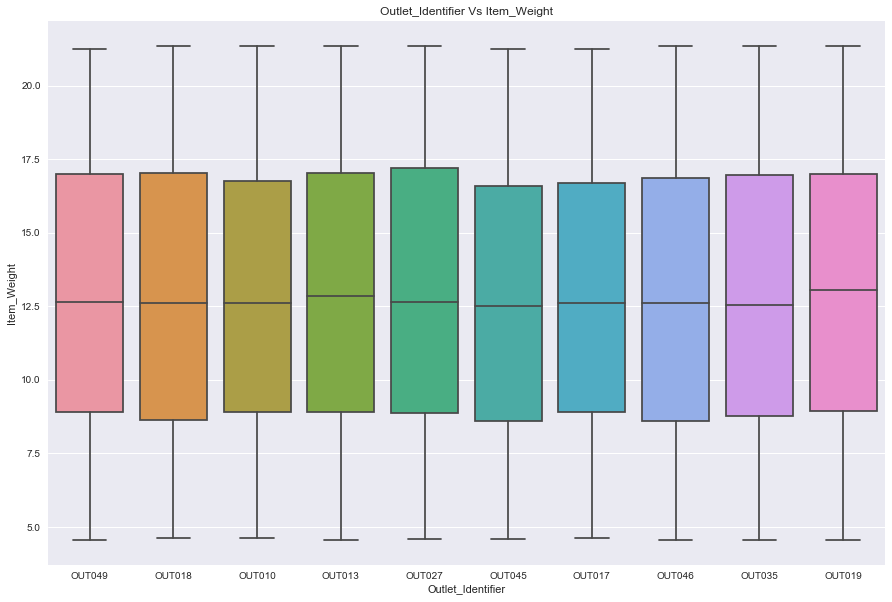

In [63]:
fig, ax = plt.subplots(figsize=(15,  10))
sns.set_style("whitegrid")
ax = sns.boxplot(y="Item_Weight", x="Outlet_Identifier", data=train)

plt.title('Outlet_Identifier Vs Item_Weight')
plt.ylabel('Item_Weight')
plt.xlabel('Outlet_Identifier')

Looking at those plots we will notice that all the Outlet Identifier (Unique store ID) have identical median , boxes and whiskers.

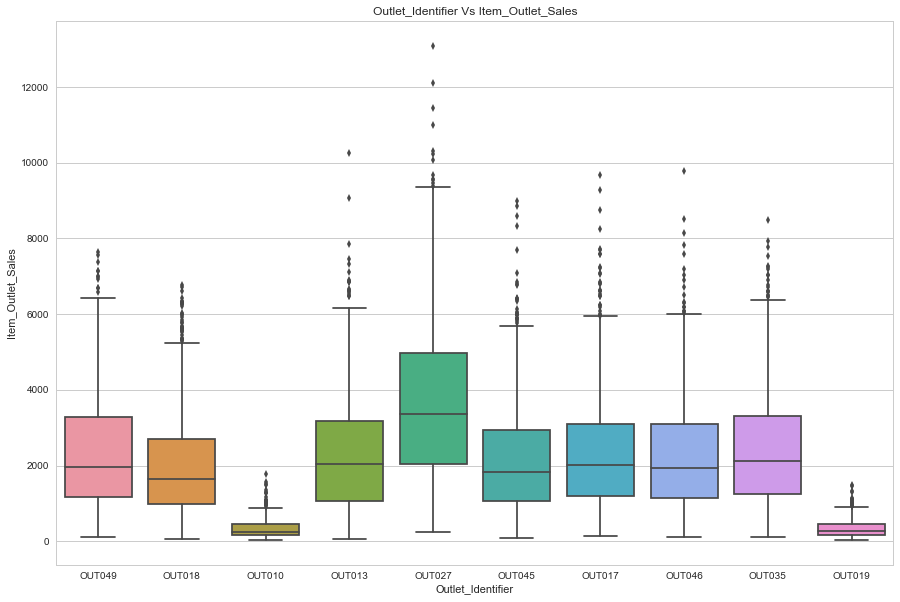

In [64]:
fig, ax = plt.subplots(figsize=(15,  10))
sns.set_style("whitegrid")
ax = sns.boxplot(y="Item_Outlet_Sales", x="Outlet_Identifier", order=None, data=train)

plt.title('Outlet_Identifier Vs Item_Outlet_Sales')
plt.ylabel('Item_Outlet_Sales')
plt.xlabel('Outlet_Identifier')

From the above boxplot, we see that the two "Grocery stores" OUT010 and OUT019 have reported far fewer sales than the supermarkets.

In [65]:
train.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_Category,Years_of_Operation
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Drinks,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Tier 3,Small,Grocery Store,Food,15
4,Non-Fat,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Non-Consumable,26


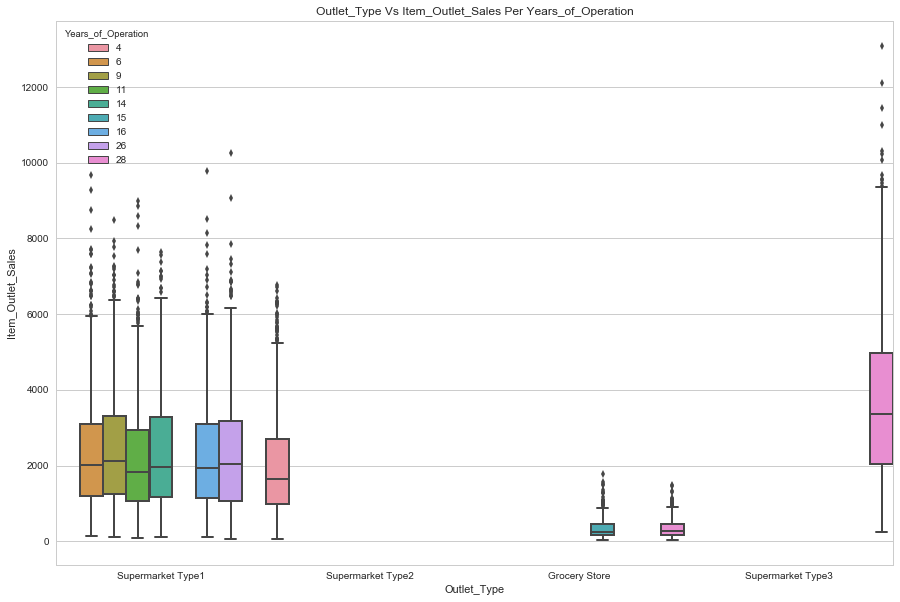

In [66]:
fig, ax = plt.subplots(figsize=(15,  10))
sns.set_style("whitegrid")
ax = sns.boxplot(y="Item_Outlet_Sales", x="Outlet_Type", hue = 'Years_of_Operation', linewidth = 2, width=1 , data=train)

plt.title('Outlet_Type Vs Item_Outlet_Sales Per Years_of_Operation' )
plt.ylabel('Item_Outlet_Sales')
plt.xlabel('Outlet_Type')

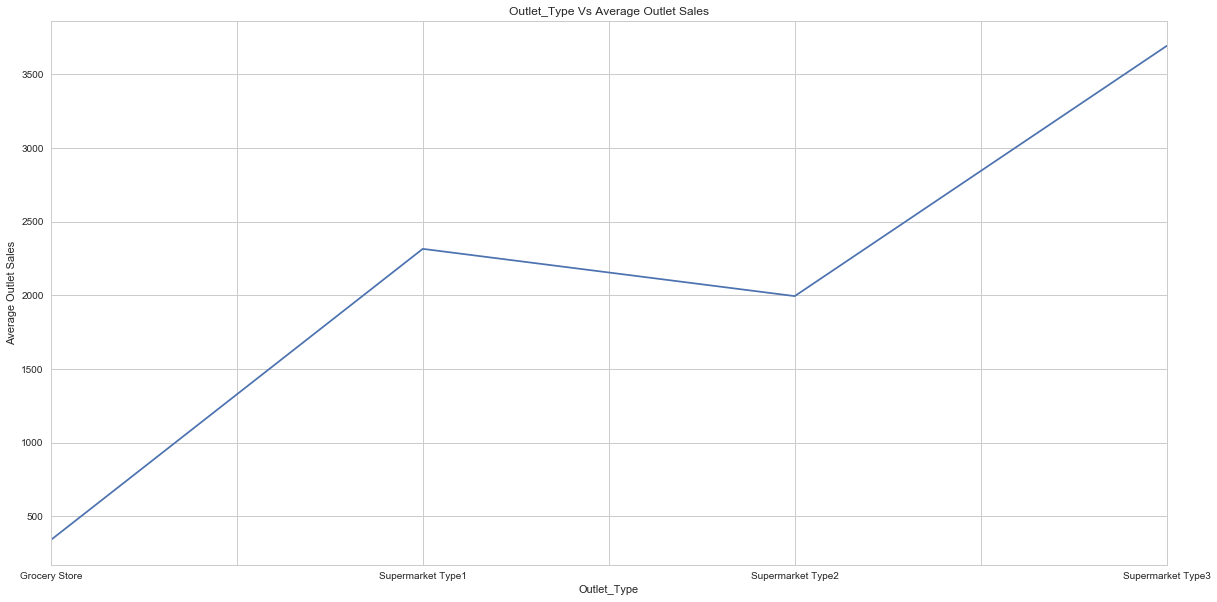

In [67]:
train.groupby('Outlet_Type').Item_Outlet_Sales.mean().plot(kind = 'line', figsize=(20, 10))

plt.title('Outlet_Type Vs Average Outlet Sales' )
plt.ylabel('Average Outlet Sales')
plt.xlabel('Outlet_Type')

Grocery stores have the least average sales while Supermarket Type 3 have the most average sales

In [68]:
train.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_Category,Years_of_Operation
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Drinks,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Tier 3,Small,Grocery Store,Food,15
4,Non-Fat,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Non-Consumable,26


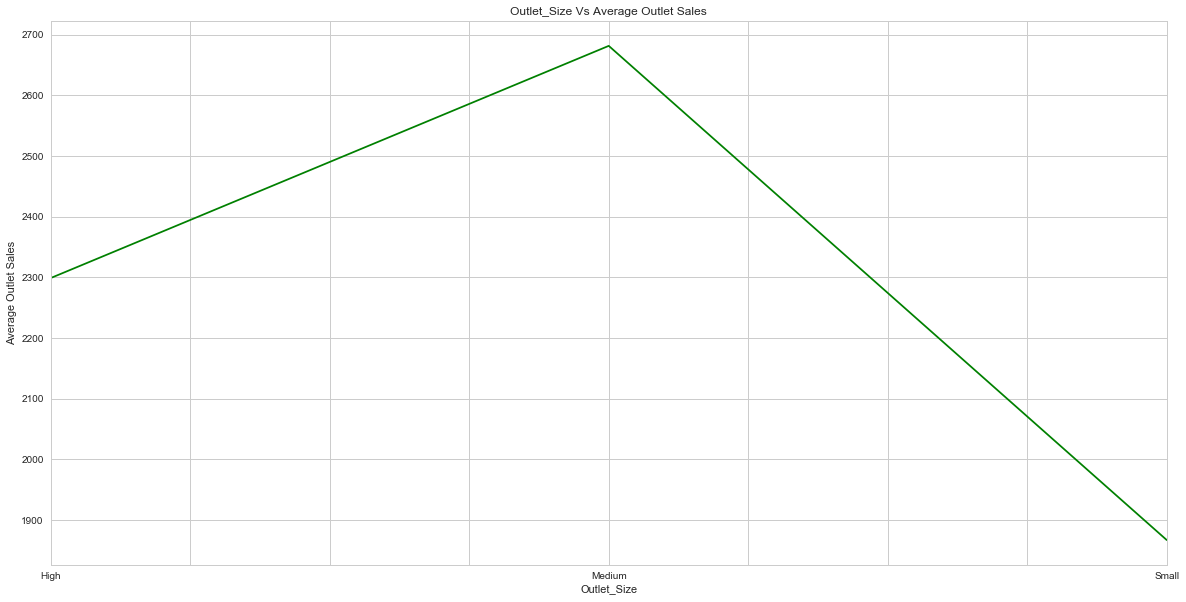

In [69]:
train.groupby('Outlet_Size').Item_Outlet_Sales.mean().plot(kind = 'line', c = 'g', figsize=(20, 10)) 

plt.title('Outlet_Size Vs Average Outlet Sales' )
plt.ylabel('Average Outlet Sales')
plt.xlabel('Outlet_Size')

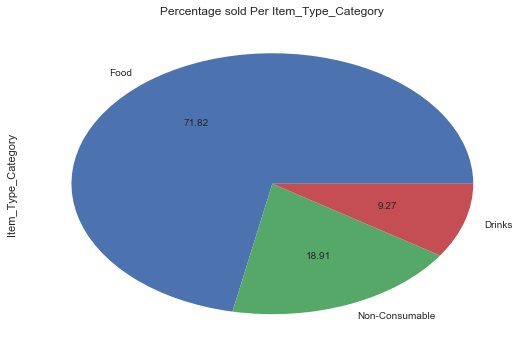

In [70]:
df.Item_Type_Category.value_counts(normalize = True).plot(kind = 'pie', figsize=(9, 6), autopct='%.2f')

plt.title('Percentage sold Per Item_Type_Category' )

The majority (71.82%) of items sold is classified as Food

In [71]:
# train.groupby('Item_Type').Item_Outlet_Sales.value_counts().plot(kind = 'pie', figsize=(20, 15), autopct='%.2f') 

# plt.ylabel('Average Outlet Sales')
# plt.xlabel('Item_Type')

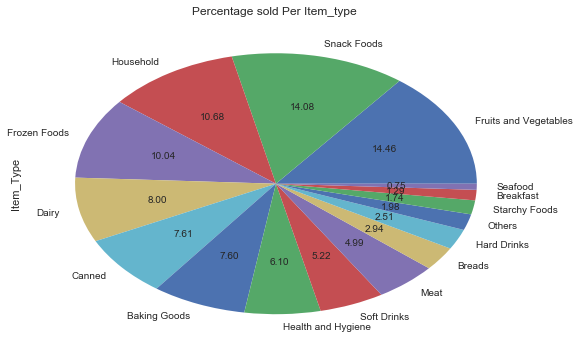

In [72]:
train.Item_Type.value_counts(normalize = True).plot(kind = 'pie', figsize=(9, 6), autopct='%.2f')

plt.title('Percentage sold Per Item_type ' )

Item type with the highest sales (14.46% of all sales) is Fruits and Vegatables with Snack and Foods (14.08) a close second. The item with the least sales (0.75%) is seafood.

In [73]:
color = ['r', 'g', 'b', 'y', 'm', '#624ea7', '']


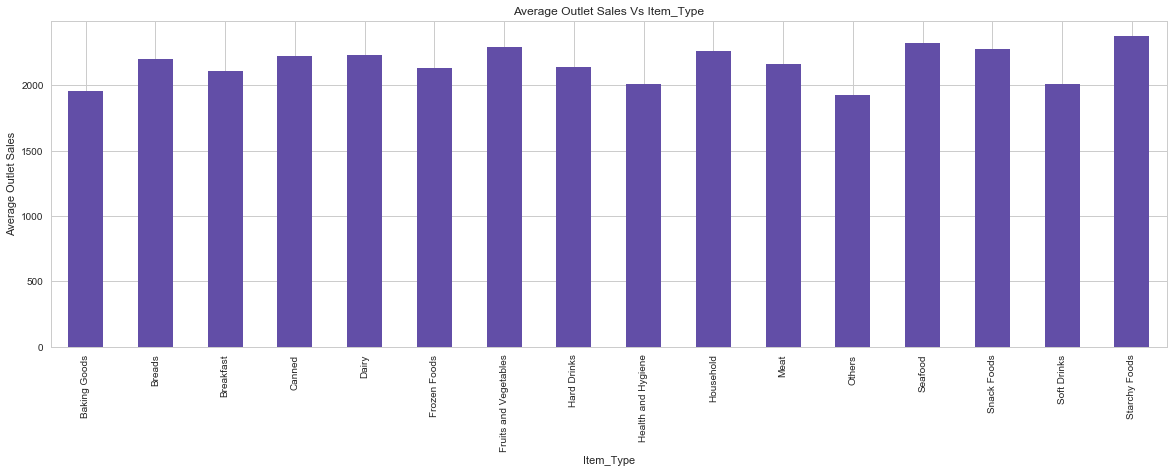

In [74]:
df.groupby('Item_Type').Item_Outlet_Sales.mean().sort_index().plot(kind = 'bar', color = '#624ea7', figsize=(20, 6))
plt.title('Average Outlet Sales Vs Item_Type')
plt.ylabel('Average Outlet Sales')
plt.xlabel('Item_Type')

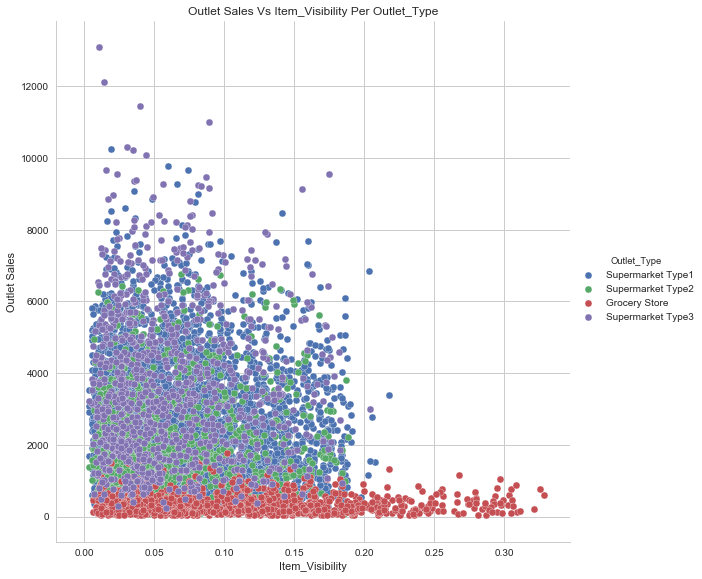

In [75]:
sns.pairplot(x_vars=["Item_Visibility"], y_vars=["Item_Outlet_Sales"], data=train, hue="Outlet_Type", size=8)

plt.title('Outlet Sales Vs Item_Visibility Per Outlet_Type')
plt.ylabel('Outlet Sales')
plt.xlabel('Item_Visibility')

Again, we can clearly see the poor sales performance of items from Grocery stores

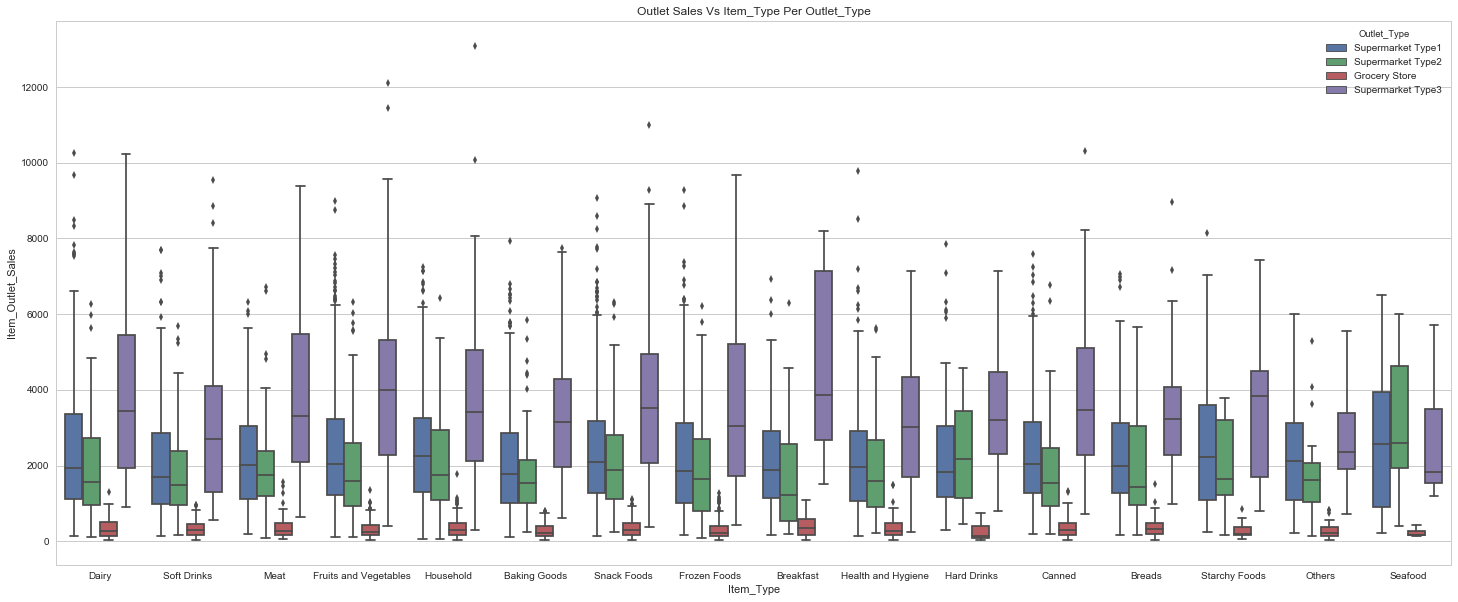

In [76]:
fig, ax = plt.subplots(figsize=(25,  10))
sns.set_style("whitegrid")
ax = sns.boxplot(y="Item_Outlet_Sales", x="Item_Type", hue = 'Outlet_Type', data=train)

plt.title('Outlet Sales Vs Item_Type Per Outlet_Type')

Supermarket Type3 seems to consistently outperformed other store outlets in all item types

# Let's chech Average Sales per Item_Type, and Sales percentage change.

In [80]:
average_sales    = train.groupby('Item_Type')["Item_Outlet_Sales"].mean()
pct_change_sales = train.groupby('Item_Type')["Item_Outlet_Sales"].sum().pct_change()
pct_change_sales

Item_Type
Baking Goods                   NaN
Breads                   -0.562840
Breakfast                -0.580110
Canned                    5.216780
Dairy                     0.054317
Frozen Foods              0.199095
Fruits and Vegetables     0.544616
Hard Drinks              -0.837665
Health and Hygiene        1.283126
Household                 0.966603
Meat                     -0.553603
Others                   -0.645238
Seafood                  -0.542672
Snack Foods              17.357082
Soft Drinks              -0.673265
Starchy Foods            -0.606448
Name: Item_Outlet_Sales, dtype: float64

In [81]:
average_sales

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

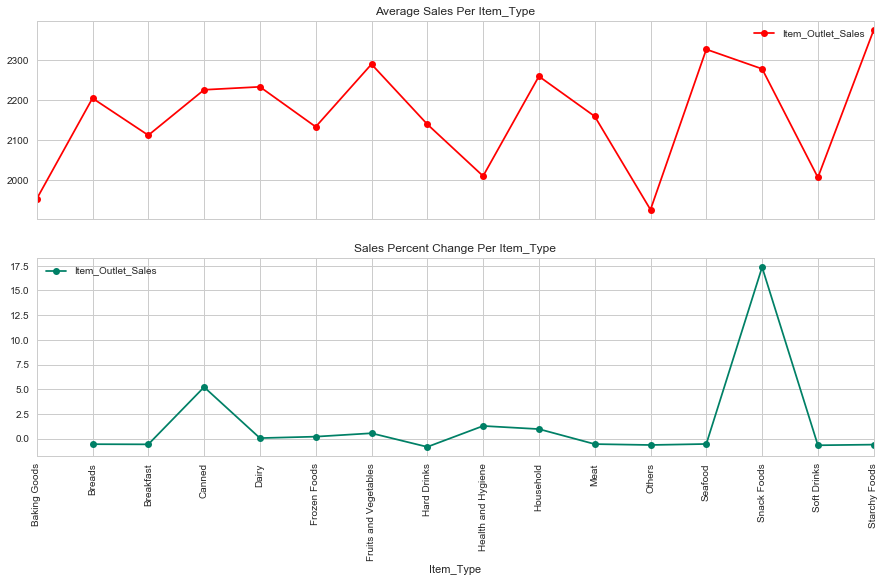

In [106]:
# plot average sales per Item_Type
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

fig1 = average_sales.plot(legend=True,ax=axis1,marker='o',colormap="flag", title="Average Sales Per Item_Type")
fig1.set_xticks(range(len(average_sales)))
fig1.set_xticklabels(average_sales.index.tolist(), rotation=90)

# plot precent change for sales per Item_Type
fig2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change Per Item_Type")

In [108]:
train.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_Category,Years_of_Operation
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Drinks,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Tier 3,Small,Grocery Store,Food,15
4,Non-Fat,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Non-Consumable,26
